<h1><center><font color=green>Generación Eléctrica de las Centrales Solares en el año 2019</font></center></h1>


Se analizará la producción eléctrica de las <b>centrales solares PV a gran escala</b> (utilities) del Perú a lo largo del año 2019.
Son 7 centrales solares que se adjudicaron en las pasadas subastas RER, todas adjudicadas a diferentes precios monómicos y puestas en operación comercial en distintas fechas.

Para mayor información, revisar las siguientes fichas técnicas elaboradas por OSINERGMIN:

<b>1. Primera Subasta:</b>
    [Central Solar Majes](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.1.pdf) |
    [Central Solar Repartición](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.2.pdf) |
    [Central Solar Tacna Solar](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.3.pdf) |
    [Central Solar Panamericana Solar](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.4.pdf)

<b>2. Segunda Subasta:</b>
    [Central Solar Moquegua FV](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.5.pdf)

<b>3. Tercera Subasta:</b>
    No se adjudicaron centrales solares  
    
<b>4. Cuarta Subasta:</b>
    [Central Solar Rubí](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.6.pdf) |
    [Central Solar Intipampa](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.7.pdf)



<center><img src="img/RUBI.png" alt="Central Solar Rubí" title="Rubí, la central solar más grande del Perú"/></center>

_<center><i>Fuente: [https://www.enel.pe](https://www.enel.pe/es/sostenibilidad/rubi-la-central-solar-de-enel-mas-grande-del-peru.html)</i></center>_

## 1. Data de Generación Solar PV

Fuente de la Data de Generación Solar PV en el Perú en el año 2019: http://www.coes.org.pe/Portal/mediciones/medidoresgeneracion

- Los medidores registran un dato cada 15 minutos (35040 filas en un año).

- La base de datos del COES solo permite descargar información hasta por un mes, por lo que necesitamos descargar 12 archivos CSV desde Enero 2019 hasta Diciembre 2019.

- Se combinaron los 12 archivos CSV para crear un único archivo de todo el año 2019: <b><i>SolarPV_PE_2019_15min.csv</i></b>.

Estos archivos se pueden encontrar en la carpeta <b><i>data</i></b> dentro del repositorio: https://github.com/KevinAQM/RenewableEnergyPeru2019

Importamos los módulos necesarios para nuestro análisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Leyendo nuestro archivo de Generación Solar PV: <b><i>SolarPV_PE_2019_15min.csv</i></b>.

In [2]:
production = pd.read_csv("data/SolarPV_PE_2019_15min.csv",
                        parse_dates=[0], index_col=0, dayfirst=1)

Un vistazo rápido de nuestro archivo.

In [3]:
production

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-01-01 00:00:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 00:15:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 00:30:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 00:45:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 01:00:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 01:15:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 01:30:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 01:45:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2019-01-01 02:00:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Información general del dataframe "production".

Se observa que hay 35040 entradas (una entrada cada 15 minutos), 7 columnas (todas de tipo punto flotante) y no hay celdas vacías o nulas.

In [4]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2019-01-01 00:00:00 to 2019-12-31 23:45:00
Data columns (total 7 columns):
C.S RUBI                  35040 non-null float64
C.S INTIPAMPA             35040 non-null float64
C.S MAJES                 35040 non-null float64
C.S REPARTICION           35040 non-null float64
C.S MOQUEGUA FV           35040 non-null float64
C.S PANAMERICANA SOLAR    35040 non-null float64
C.S TACNA SOLAR           35040 non-null float64
dtypes: float64(7)
memory usage: 2.1 MB


## 2. Análisis de la Potencia Solar PV

La unidad a utilizar es el megawatt (MW).

In [5]:
production.describe()

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,48.290363,12.064108,5.055163,4.952743,5.400192,5.856255,5.336171
std,58.729563,15.082345,6.660896,6.527860,6.566210,7.155360,7.142198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.433120,0.009780,0.000000,0.000000,0.025680,0.000000,0.000000
75%,116.062067,29.592720,11.113700,10.842562,13.100162,14.228000,13.676007
max,157.677380,41.381500,19.942770,19.040060,16.121380,18.624000,19.162850


De las estádisticas básicas del dataframe "production" podemos observar que todas las centrales solares tienen una potencia máxima mayor a su potencia adjudicada (consignada). Por ejemplo:

**Crear una tabla mostrando en las filas las centrales solares y en columnas (potencia adjudicada, potencia máxima, fecha de la potencia máxima).



Si gráficamos la producción de las centrales solares con esta resolución (15 min) obtenemos mucho "ruido" y no se aprecia bien el comportamiento de estas centrales. Esto debido a que en este tipo de gráficos se unen todos los puntos con una línea recta.

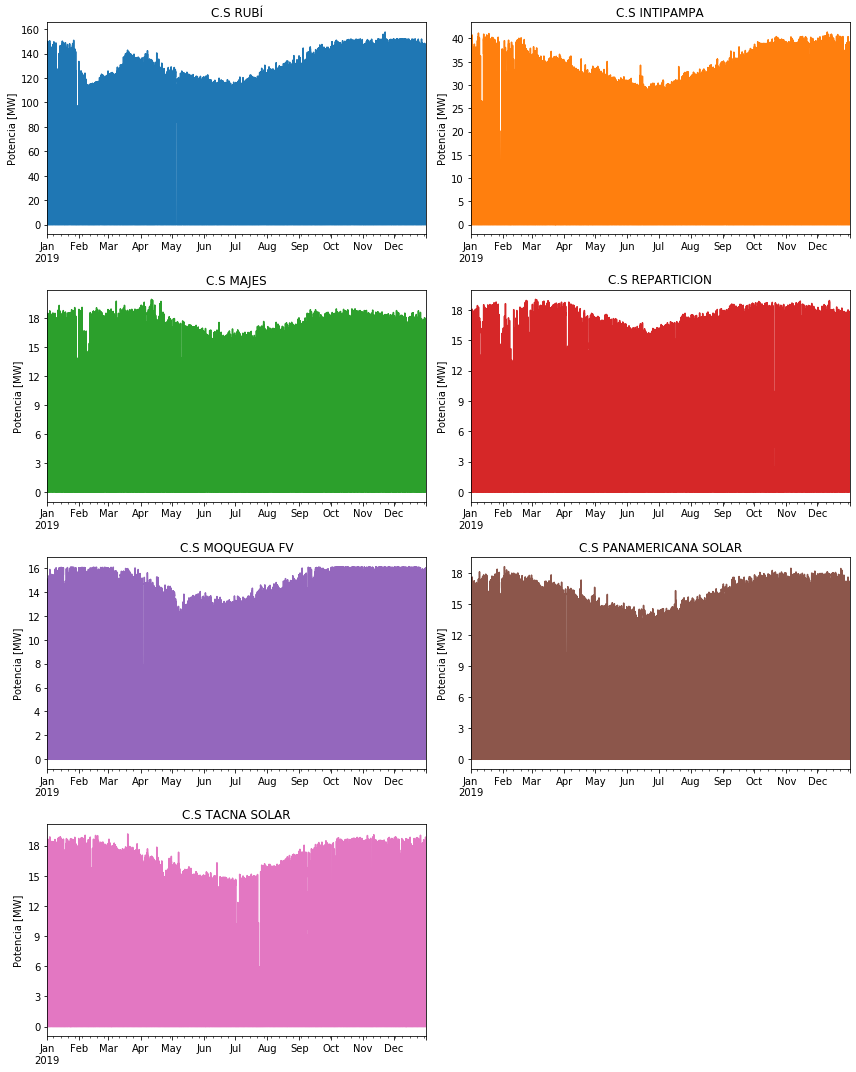

In [6]:
#Falta agregar Título
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,15));

production['C.S RUBI'].plot(ax=ax[0,0], title='C.S RUBÍ', color = 'C0')
production['C.S INTIPAMPA'].plot(ax=ax[0,1], title='C.S INTIPAMPA', color='C1')
production['C.S MAJES'].plot(ax=ax[1,0], title='C.S MAJES', color='C2')
production['C.S REPARTICION'].plot(ax=ax[1,1], title='C.S REPARTICION', color='C3')
production['C.S MOQUEGUA FV'].plot(ax=ax[2,0], title='C.S MOQUEGUA FV', color='C4')
production['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], title='C.S PANAMERICANA SOLAR', color='C5')
production['C.S TACNA SOLAR'].plot(ax=ax[3,0], title='C.S TACNA SOLAR', color='C6')

fig.delaxes(ax[3][1])

for ax in fig.get_axes():
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

En el siguiente gráfico observamos la potencia total de la energía solar FV en el Perú a lo largo del año 2019. Esto es, la potencia total de todas las centrales solares cada 15 minutos.

In [7]:
production_new = production
production_new['TOTAL'] = production_new[0::].sum(axis=1)

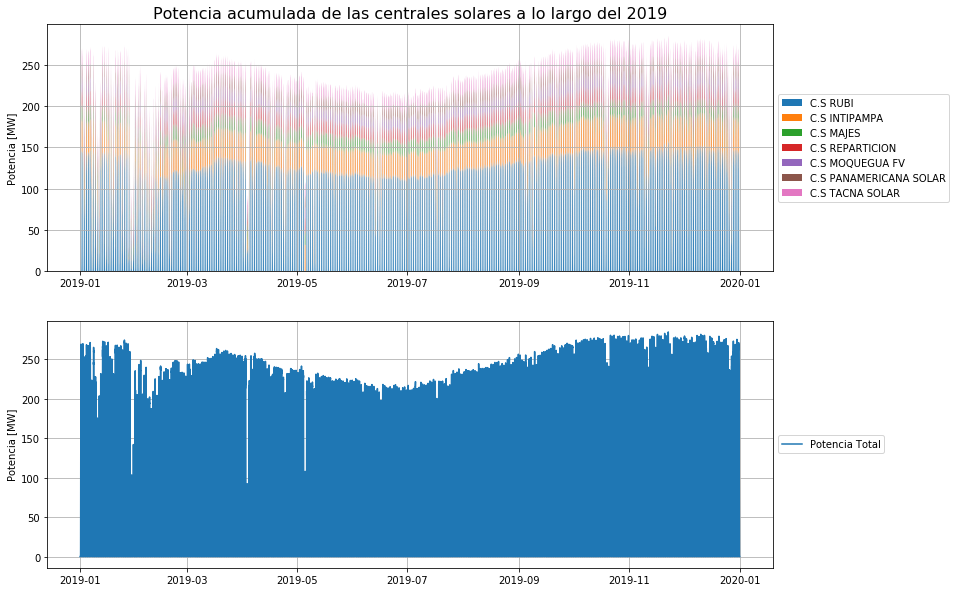

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13,10));

ax[0].stackplot(production.index, production['C.S RUBI'], production['C.S INTIPAMPA'], production['C.S MAJES'], production['C.S REPARTICION'], 
             production['C.S MOQUEGUA FV'], production['C.S PANAMERICANA SOLAR'], production['C.S TACNA SOLAR'], labels=production.columns)

ax[1].plot(production_new.index, production_new['TOTAL'], label='Potencia Total')

ax[0].set_title('Potencia acumulada de las centrales solares a lo largo del 2019', fontsize=16)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

for ax in fig.get_axes():
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')
    ax.grid(True)
    
plt.show()

# Cambiar de gráfico al último subplot --> a puntos

Para tener una mejor visualización de nuestros datos, utilizaremos las funciones <i>"resample"</i> y <i>"rolling"</i>.

- Con la función <i>"resample"</i> obtenemos promedios horarios, diarios y mensuales; los cuales nos servirán para hacer nuestros análisis de performance de las centrales solares.
- Con la función <i>"rolling"</i>, o también conocido como Moving Average o MA, obtenemos una tendencia de los datos de acuerdo a una 'ventana' seleccionada. El MA es muy útil para darnos una idea de la distribución y tendencia de nuestros datos al momento de graficarlos.

<b>Obteniendo un dato horario (promedio horario) con <i>"resample"</i>.</b>

In [11]:
production_hourly = production.resample('H').mean()

production_hourly.head()

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Como se ve se ha hecho un promedio horario. Pasando de 35040 entradas a 8760 entradas horarias.

In [12]:
production_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Freq: H
Data columns (total 7 columns):
C.S RUBI                  8760 non-null float64
C.S INTIPAMPA             8760 non-null float64
C.S MAJES                 8760 non-null float64
C.S REPARTICION           8760 non-null float64
C.S MOQUEGUA FV           8760 non-null float64
C.S PANAMERICANA SOLAR    8760 non-null float64
C.S TACNA SOLAR           8760 non-null float64
dtypes: float64(7)
memory usage: 547.5 KB


<b>Obteniendo un dato diario (promedio diario) con <i>"resample"</i>.</b>

In [13]:
production_daily = production.resample('D').mean()

production_daily.head()

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-01-01,49.030858,11.263502,5.385490,4.763484,4.962078,5.454750,5.739292
2019-01-02,52.148410,11.400276,5.371046,5.113774,5.250483,5.812719,5.156676
2019-01-03,42.869956,8.805560,5.229055,5.133585,4.637286,5.122198,5.595212
2019-01-04,59.427452,14.441042,5.744085,5.513143,5.803652,6.330604,6.689323
2019-01-05,62.376399,15.335991,5.718372,5.546593,6.079222,7.003635,6.859854


Como se ve se ha hecho un promedio diario. Pasando de 35040 entradas a 365 entradas diarias.

In [14]:
production_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 7 columns):
C.S RUBI                  365 non-null float64
C.S INTIPAMPA             365 non-null float64
C.S MAJES                 365 non-null float64
C.S REPARTICION           365 non-null float64
C.S MOQUEGUA FV           365 non-null float64
C.S PANAMERICANA SOLAR    365 non-null float64
C.S TACNA SOLAR           365 non-null float64
dtypes: float64(7)
memory usage: 22.8 KB


<b>Obteniendo un dato mensual (promedio mensual) con <i>"resample"</i>.</b>

In [19]:
production_monthly = production.resample('M').mean()

production_monthly

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR,TOTAL
FECHA,,,,,,,,
2019-01-31,41.419159,9.791668,4.926856,4.544492,4.489387,4.888401,5.587866,75.647827
2019-02-28,37.795916,9.620811,4.567383,4.190072,5.275700,5.744936,6.082660,73.277479
2019-03-31,50.198742,12.342859,5.413034,5.321933,5.909342,6.398193,6.355936,91.940038
2019-04-30,43.571884,10.976218,4.951352,4.777951,4.785904,5.197121,5.107929,79.368360
2019-05-31,42.169438,11.103257,4.795791,4.840155,4.642360,5.138734,4.483656,77.173391
2019-06-30,40.955159,10.082871,4.587959,4.475943,4.545468,4.839465,3.946383,73.433248
2019-07-31,42.766888,10.662793,4.703732,4.802491,4.931968,5.282351,3.919397,77.069621
2019-08-31,49.296491,12.174646,5.051404,5.159729,5.629662,6.057485,5.425537,88.794953
2019-09-30,52.452576,13.002131,5.350406,5.306952,5.728044,6.211267,5.329961,93.381337


Como se ve se ha hecho un promedio mensual. Pasando de 35040 entradas a 12 entradas mensuales.

In [20]:
production_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-01-31 to 2019-12-31
Freq: M
Data columns (total 8 columns):
C.S RUBI                  12 non-null float64
C.S INTIPAMPA             12 non-null float64
C.S MAJES                 12 non-null float64
C.S REPARTICION           12 non-null float64
C.S MOQUEGUA FV           12 non-null float64
C.S PANAMERICANA SOLAR    12 non-null float64
C.S TACNA SOLAR           12 non-null float64
TOTAL                     12 non-null float64
dtypes: float64(8)
memory usage: 864.0 bytes


<b>Obteniendo una tendencia horaria con <i>"rolling"</i>.</b>

Como nuestros datos originales tienen una resolución de 15 min, utilizaremos una "ventana" de 4 para obtener un desfase de 1 hora.

In [14]:
production_MA_hour = production.rolling(window=4).mean()

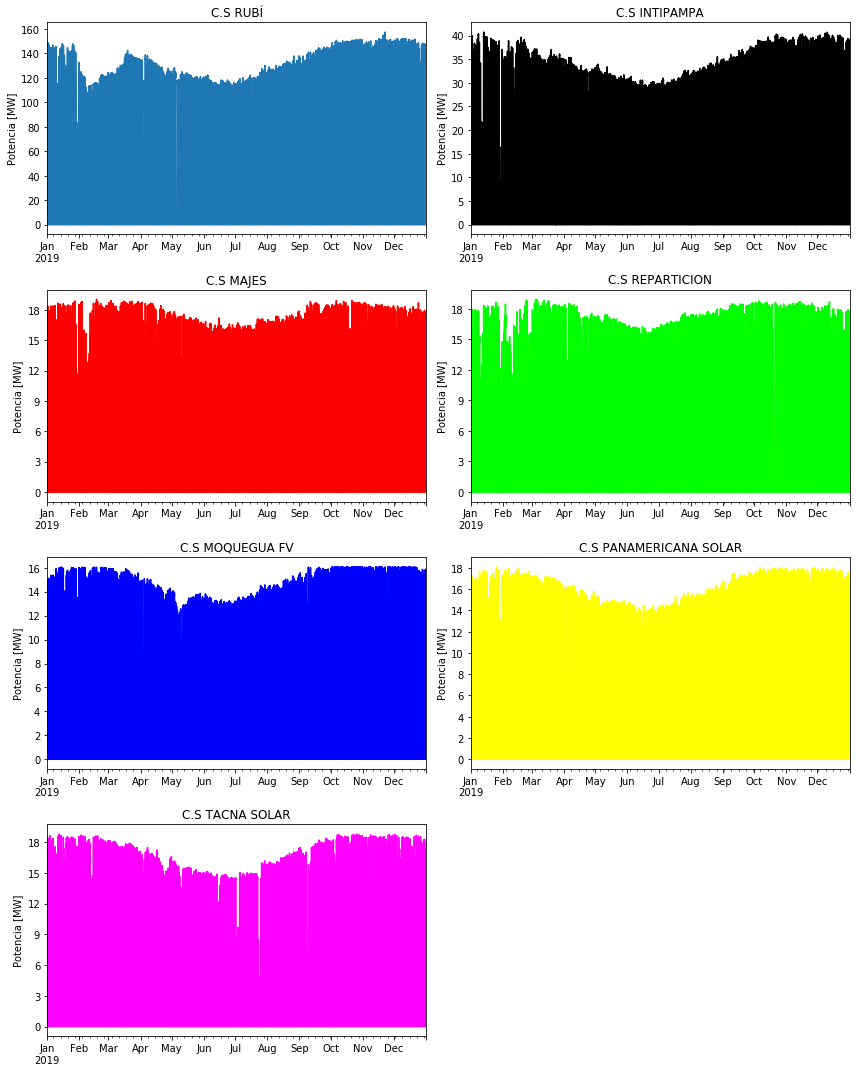

In [144]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,15));

production_MA_hour['C.S RUBI'].plot(ax=ax[0,0], title='C.S RUBÍ')
production_MA_hour['C.S INTIPAMPA'].plot(ax=ax[0,1], title='C.S INTIPAMPA', color=(0,0,0))
production_MA_hour['C.S MAJES'].plot(ax=ax[1,0], title='C.S MAJES', color=(1,0,0))
production_MA_hour['C.S REPARTICION'].plot(ax=ax[1,1], title='C.S REPARTICION', color=(0,1,0))
production_MA_hour['C.S MOQUEGUA FV'].plot(ax=ax[2,0], title='C.S MOQUEGUA FV', color=(0,0,1))
production_MA_hour['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], title='C.S PANAMERICANA SOLAR', color=(1,1,0))
production_MA_hour['C.S TACNA SOLAR'].plot(ax=ax[3,0], title='C.S TACNA SOLAR', color=(1,0,1))

fig.delaxes(ax[3][1])

for ax in fig.get_axes():
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

<b>Obteniendo una tendencia diaria con <i>"rolling"</i>.</b>

Como nuestros datos originales tienen una resolución de 15 min, utilizaremos una "ventana" de 96 para obtener un desfase de 1 día.

In [16]:
production_MA_day = production.rolling(window=96).mean()

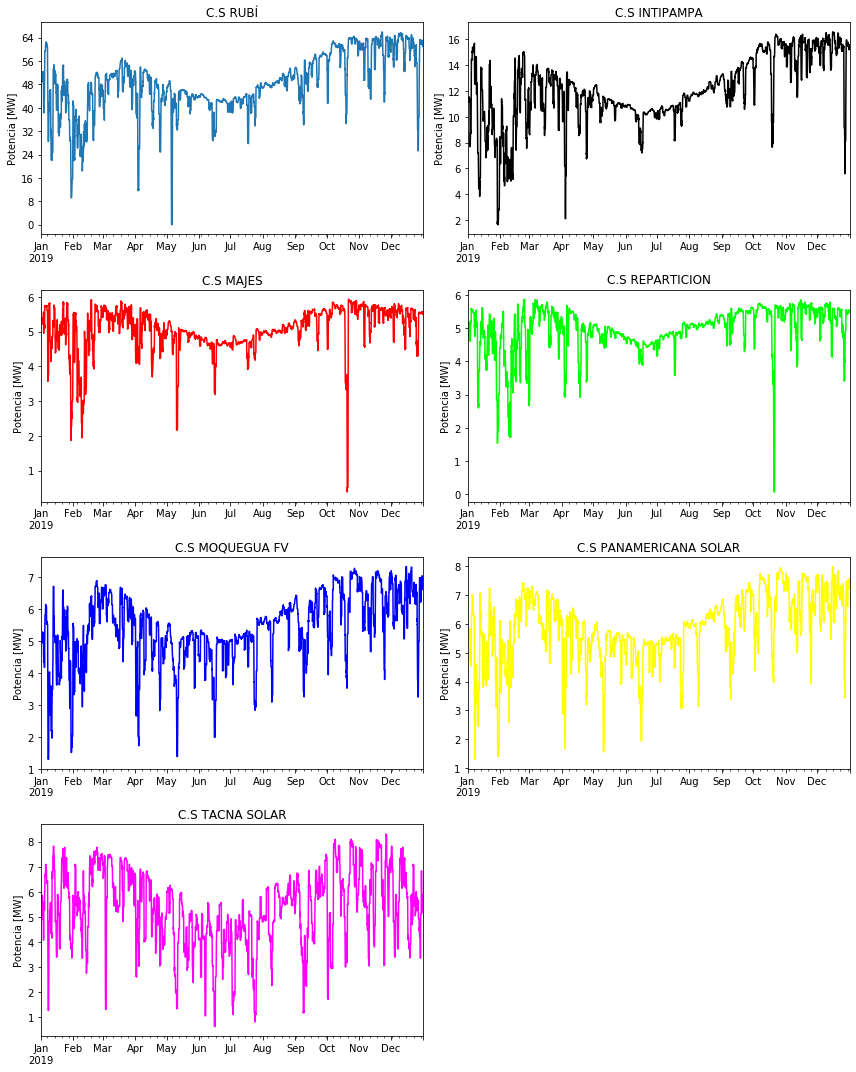

In [31]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,15));

production_MA_day['C.S RUBI'].plot(ax=ax[0,0], title='C.S RUBÍ')
production_MA_day['C.S INTIPAMPA'].plot(ax=ax[0,1], title='C.S INTIPAMPA', color=(0,0,0))
production_MA_day['C.S MAJES'].plot(ax=ax[1,0], title='C.S MAJES', color=(1,0,0))
production_MA_day['C.S REPARTICION'].plot(ax=ax[1,1], title='C.S REPARTICION', color=(0,1,0))
production_MA_day['C.S MOQUEGUA FV'].plot(ax=ax[2,0], title='C.S MOQUEGUA FV', color=(0,0,1))
production_MA_day['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], title='C.S PANAMERICANA SOLAR', color=(1,1,0))
production_MA_day['C.S TACNA SOLAR'].plot(ax=ax[3,0], title='C.S TACNA SOLAR', color=(1,0,1))

fig.delaxes(ax[3][1])

for ax in fig.get_axes():
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

<b>Obteniendo una tendencia mensual con <i>"rolling"</i>.</b>

Como nuestros datos originales tienen una resolución de 15 min, utilizaremos una "ventana" de 2880 para obtener un desfase de 1 mes.

In [18]:
production_MA_month = production.rolling(window=2880).mean()

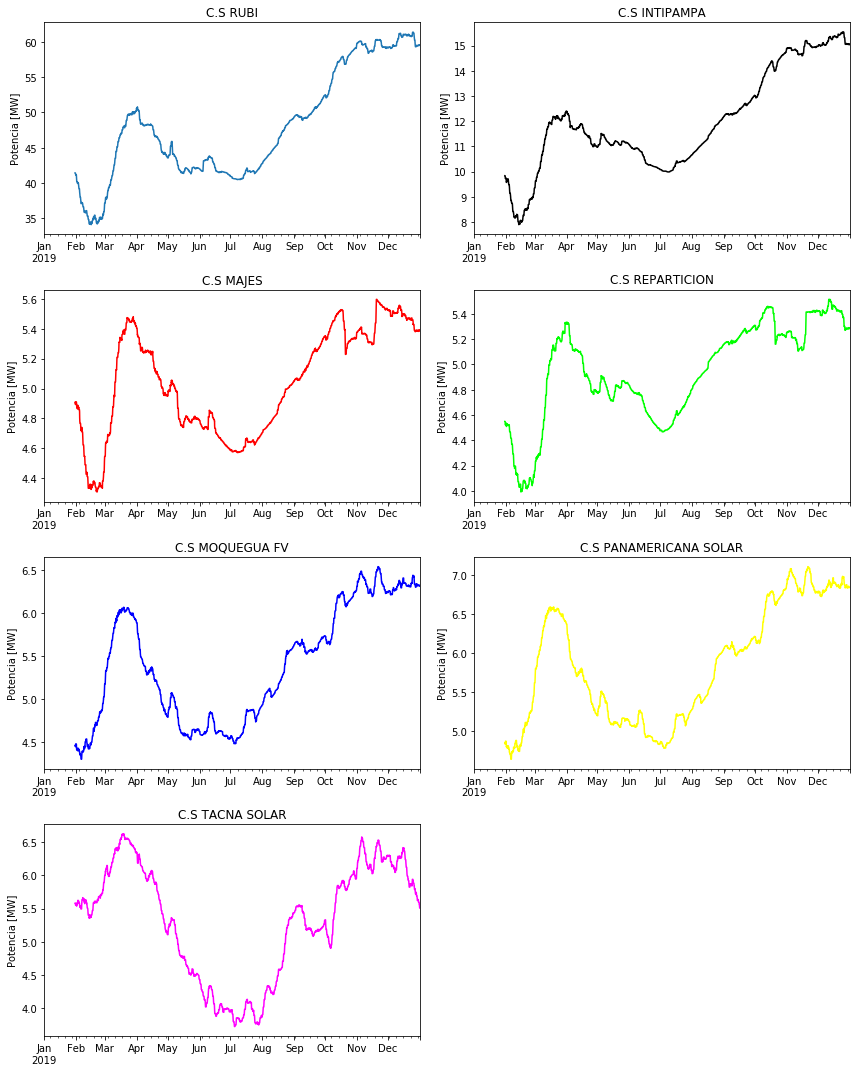

In [62]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,15));

production_MA_month['C.S RUBI'].plot(ax=ax[0,0], title='C.S RUBI')
production_MA_month['C.S INTIPAMPA'].plot(ax=ax[0,1], title='C.S INTIPAMPA', color=(0,0,0))
production_MA_month['C.S MAJES'].plot(ax=ax[1,0], title='C.S MAJES', color=(1,0,0))
production_MA_month['C.S REPARTICION'].plot(ax=ax[1,1], title='C.S REPARTICION', color=(0,1,0))
production_MA_month['C.S MOQUEGUA FV'].plot(ax=ax[2,0], title='C.S MOQUEGUA FV', color=(0,0,1))
production_MA_month['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], title='C.S PANAMERICANA SOLAR', color=(1,1,0))
production_MA_month['C.S TACNA SOLAR'].plot(ax=ax[3,0], title='C.S TACNA SOLAR', color=(1,0,1))

fig.delaxes(ax[3][1])

for ax in fig.get_axes():
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')

plt.tight_layout()

<b>Combinando las tendencias horarias, diarias y mensuales en una sola gráfica para cada central solar.

Por cuestiones de visualización se graficará cambiará el tipo de gráfica de la tendencia horaria de linea recta a puntos. Estos nos permite visualizar mejor el comportamiento de nuestra centrales.

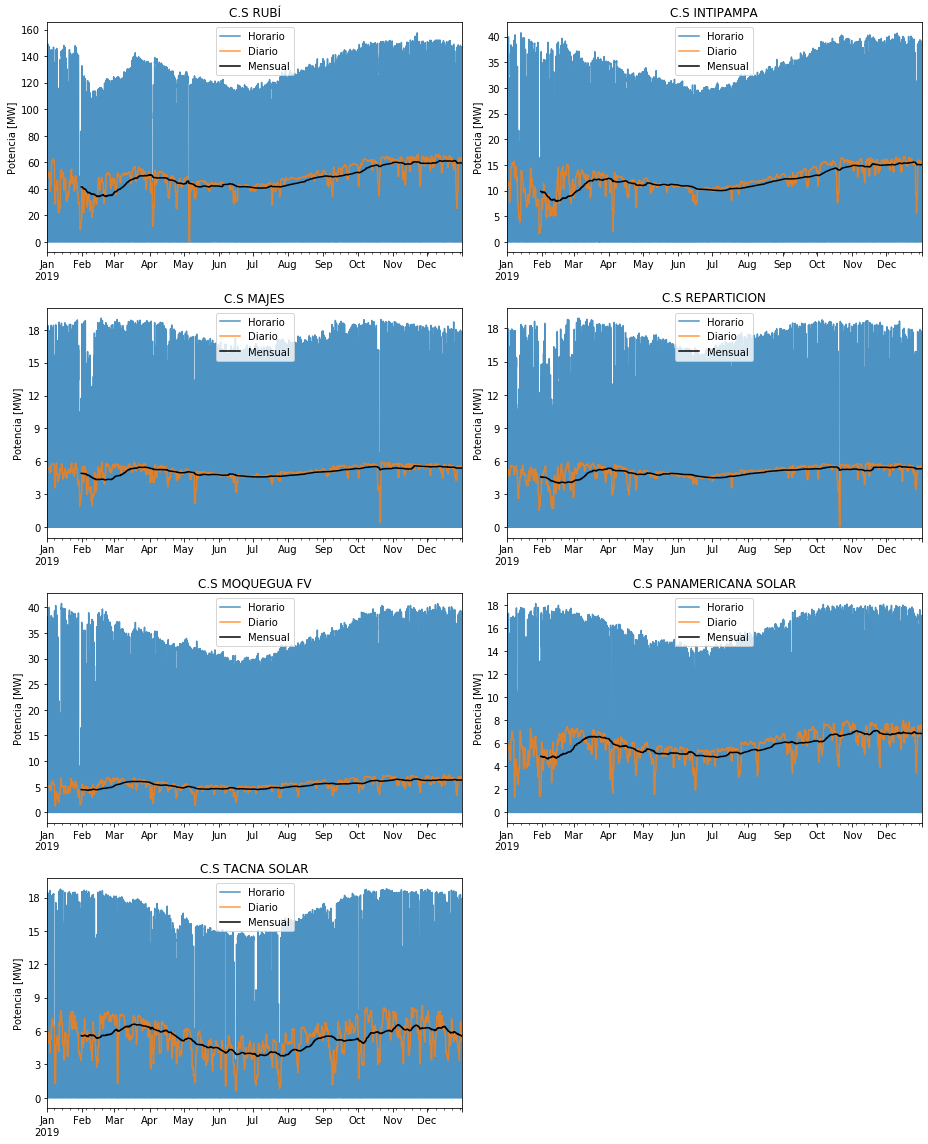

In [146]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(13,16));

production_MA_hour['C.S RUBI'].plot(ax=ax[0,0], alpha=0.8)
production_MA_day['C.S RUBI'].plot(ax=ax[0,0], title='C.S RUBÍ', alpha=0.8)
production_MA_month['C.S RUBI'].plot(ax=ax[0,0], color=(0,0,0))

production_MA_hour['C.S INTIPAMPA'].plot(ax=ax[0,1], alpha=0.8)
production_MA_day['C.S INTIPAMPA'].plot(ax=ax[0,1], title='C.S INTIPAMPA', alpha=0.8)
production_MA_month['C.S INTIPAMPA'].plot(ax=ax[0,1], color=(0,0,0))

production_MA_hour['C.S MAJES'].plot(ax=ax[1,0], alpha=0.8)
production_MA_day['C.S MAJES'].plot(ax=ax[1,0], title='C.S MAJES', alpha=0.8)
production_MA_month['C.S MAJES'].plot(ax=ax[1,0], color=(0,0,0))

production_MA_hour['C.S REPARTICION'].plot(ax=ax[1,1], alpha=0.8)
production_MA_day['C.S REPARTICION'].plot(ax=ax[1,1], title='C.S REPARTICION', alpha=0.8)
production_MA_month['C.S REPARTICION'].plot(ax=ax[1,1], color=(0,0,0))

production_MA_hour['C.S INTIPAMPA'].plot(ax=ax[2,0], alpha=0.8)
production_MA_day['C.S MOQUEGUA FV'].plot(ax=ax[2,0], title='C.S MOQUEGUA FV', alpha=0.8)
production_MA_month['C.S MOQUEGUA FV'].plot(ax=ax[2,0], color=(0,0,0))

production_MA_hour['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], alpha=0.8)
production_MA_day['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], title='C.S PANAMERICANA SOLAR', alpha=0.8)
production_MA_month['C.S PANAMERICANA SOLAR'].plot(ax=ax[2,1], color=(0,0,0))

production_MA_hour['C.S TACNA SOLAR'].plot(ax=ax[3,0], alpha=0.8)
production_MA_day['C.S TACNA SOLAR'].plot(ax=ax[3,0], title='C.S TACNA SOLAR', alpha=0.8)
production_MA_month['C.S TACNA SOLAR'].plot(ax=ax[3,0], color=(0,0,0))

fig.delaxes(ax[3][1])

for ax in fig.get_axes():
    ax.legend(['Horario', 'Diario', 'Mensual'], loc='upper center')
    ax.xaxis.set_label_text("")
    ax.set_ylabel('Potencia [MW]')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

<b>Histogramas</b>

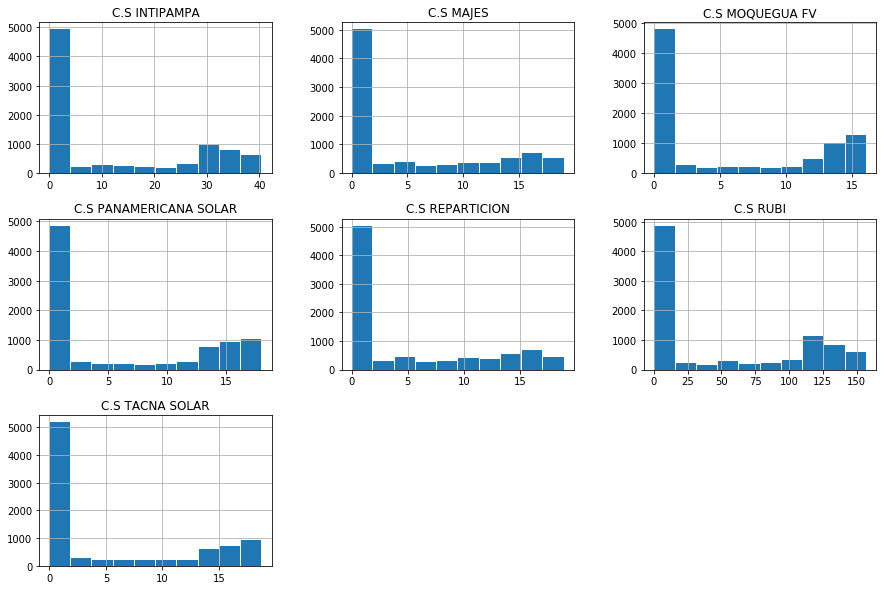

In [35]:
production_hourly.hist(bins=10, figsize=(15,10), rwidth=0.95)
plt.show()

<b>Perfil diario de las centrales solares</b>

Para ver el comportamiento de las centrales solares a lo largo del día graficaremos sus perfiles diarios.

Agrupamos los datos por hora y obtenemos el promedio o media.

In [36]:
by_time = production_hourly.groupby(production_hourly.index.time).mean()
by_time

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
01:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
02:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
03:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
04:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000084,0.000000
05:00:00,0.866784,0.218452,2.169947e-02,0.027270,0.032952,0.338965,0.015240
06:00:00,20.568090,4.719760,9.043864e-01,0.873070,1.305832,3.670719,1.076466
07:00:00,77.956353,18.209973,4.433378e+00,4.396017,6.418555,9.983025,4.916789
08:00:00,114.083628,29.675928,9.043094e+00,8.889589,10.699318,13.070836,8.716369
09:00:00,123.171361,32.569663,1.279506e+01,12.706497,12.699534,14.566789,12.039512


In [42]:
by_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00:00:00 to 23:00:00
Data columns (total 7 columns):
C.S RUBI                  24 non-null float64
C.S INTIPAMPA             24 non-null float64
C.S MAJES                 24 non-null float64
C.S REPARTICION           24 non-null float64
C.S MOQUEGUA FV           24 non-null float64
C.S PANAMERICANA SOLAR    24 non-null float64
C.S TACNA SOLAR           24 non-null float64
dtypes: float64(7)
memory usage: 1.5+ KB


Obtenemos un perfil diario para todo el año.

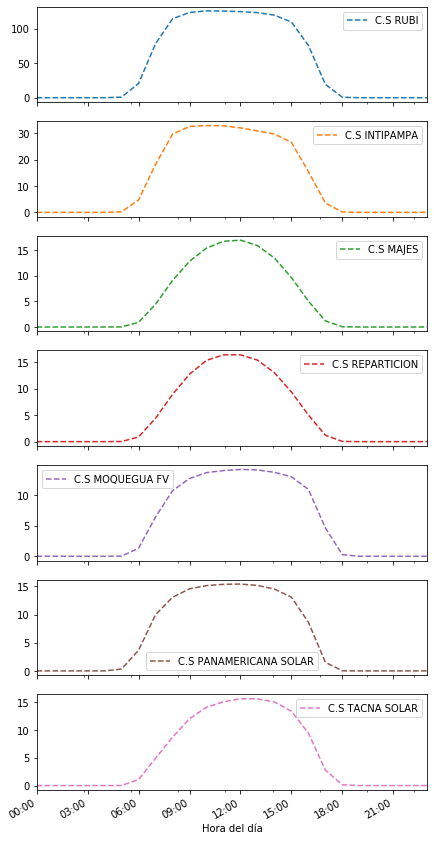

In [37]:
hourly_ticks = 3*60*60*np.arange(8)

by_time.plot(subplots=True, xticks=hourly_ticks, layout=(7,1), figsize=(7, 16), style='--')
plt.xlabel('Hora del día')

plt.show()

Sin embargo, a veces es útil sacar un perfil diario por cada mes puesto que la radiación solar no es la misma a lo largo del año.

In [38]:
by_time_jan = production_hourly['2019-1'].groupby(production_hourly['2019-1'].index.time).mean()
by_time_feb = production_hourly['2019-2'].groupby(production_hourly['2019-2'].index.time).mean()
by_time_mar = production_hourly['2019-3'].groupby(production_hourly['2019-3'].index.time).mean()
by_time_apr = production_hourly['2019-4'].groupby(production_hourly['2019-4'].index.time).mean()
by_time_may = production_hourly['2019-5'].groupby(production_hourly['2019-5'].index.time).mean()
by_time_jun = production_hourly['2019-6'].groupby(production_hourly['2019-6'].index.time).mean()
by_time_jul = production_hourly['2019-7'].groupby(production_hourly['2019-7'].index.time).mean()
by_time_aug = production_hourly['2019-8'].groupby(production_hourly['2019-8'].index.time).mean()
by_time_sep = production_hourly['2019-9'].groupby(production_hourly['2019-9'].index.time).mean()
by_time_oct = production_hourly['2019-10'].groupby(production_hourly['2019-10'].index.time).mean()
by_time_nov = production_hourly['2019-11'].groupby(production_hourly['2019-11'].index.time).mean()
by_time_dec = production_hourly['2019-12'].groupby(production_hourly['2019-12'].index.time).mean()

by_month =[by_time_jan, by_time_feb, by_time_mar, by_time_apr, by_time_may, by_time_jun, 
           by_time_jul, by_time_aug, by_time_sep, by_time_oct, by_time_nov, by_time_dec]

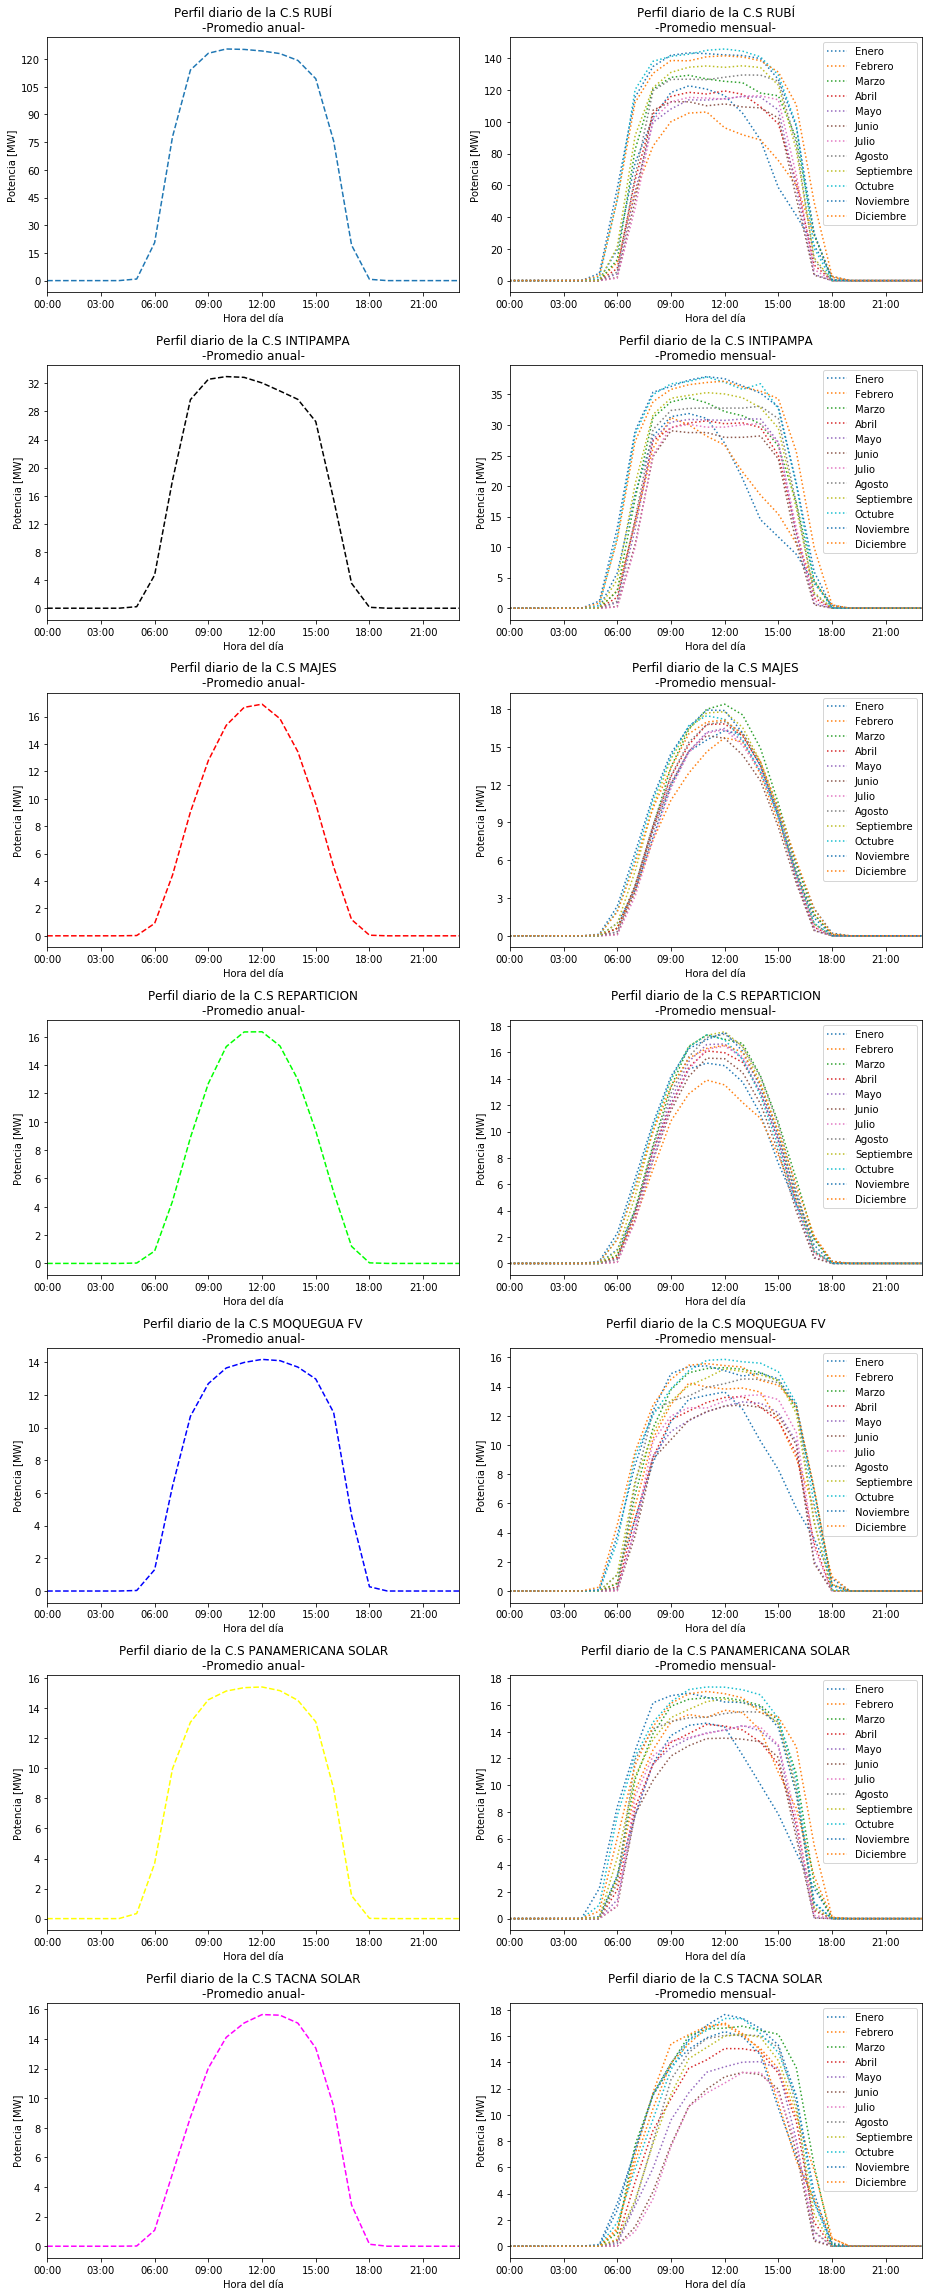

In [156]:
fig, ax = plt.subplots(7, 2, figsize=(13, 32))

#C.S RUBÍ
by_time['C.S RUBI'].plot(ax=ax[0,0], title='Perfil diario de la C.S RUBÍ\n-Promedio anual-', xticks=hourly_ticks, style=['--'])

for month in by_month:
    month['C.S RUBI'].plot(ax=ax[0,1], title='Perfil diario de la C.S RUBÍ\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S INTIPAMPA 
by_time['C.S INTIPAMPA'].plot(ax=ax[1,0], title='Perfil diario de la C.S INTIPAMPA\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(0,0,0))

for month in by_month:
    month['C.S INTIPAMPA'].plot(ax=ax[1,1], title='Perfil diario de la C.S INTIPAMPA\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S MAJES  
by_time['C.S MAJES'].plot(ax=ax[2,0], title='Perfil diario de la C.S MAJES\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(1,0,0))

for month in by_month:
    month['C.S MAJES'].plot(ax=ax[2,1], title='Perfil diario de la C.S MAJES\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S REPARTICIÓN 
by_time['C.S REPARTICION'].plot(ax=ax[3,0], title='Perfil diario de la C.S REPARTICION\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(0,1,0))

for month in by_month:
    month['C.S REPARTICION'].plot(ax=ax[3,1], title='Perfil diario de la C.S REPARTICION\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S MOQUEGUA FV 
by_time['C.S MOQUEGUA FV'].plot(ax=ax[4,0], title='Perfil diario de la C.S MOQUEGUA FV\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(0,0,1))

for month in by_month:
    month['C.S MOQUEGUA FV'].plot(ax=ax[4,1], title='Perfil diario de la C.S MOQUEGUA FV\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S PANAMERICANA SOLAR 
by_time['C.S PANAMERICANA SOLAR'].plot(ax=ax[5,0], title='Perfil diario de la C.S PANAMERICANA SOLAR\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(1,1,0))

for month in by_month:
    month['C.S PANAMERICANA SOLAR'].plot(ax=ax[5,1], title='Perfil diario de la C.S PANAMERICANA SOLAR\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#C.S TACNA SOLAR 
by_time['C.S TACNA SOLAR'].plot(ax=ax[6,0], title='Perfil diario de la C.S TACNA SOLAR\n-Promedio anual-', xticks=hourly_ticks, style=['--'], color=(1,0,1))

for month in by_month:
    month['C.S TACNA SOLAR'].plot(ax=ax[6,1], title='Perfil diario de la C.S TACNA SOLAR\n-Promedio mensual-', xticks=hourly_ticks, style=[':']);

#-------
months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')

for i in range(7):
    ax[i,1].legend(months, loc='upper right')

for ax in fig.get_axes():
    ax.set_ylabel('Potencia [MW]')
    ax.xaxis.set_label_text("Hora del día")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

---

## 2. Análisis de la Energía Solar PV

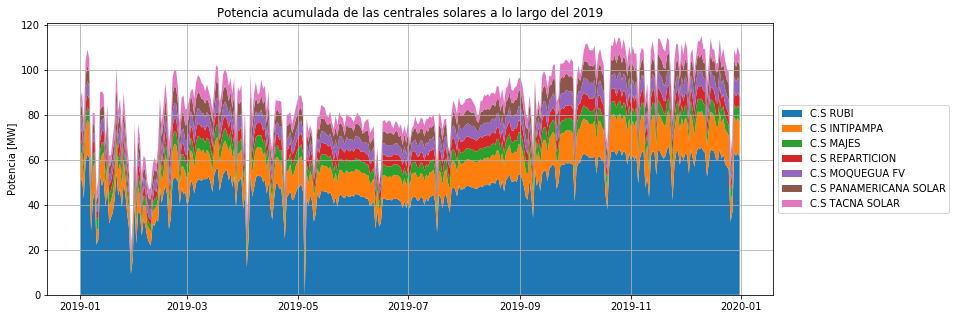

In [21]:
# CAMBIAR A ENERGÍA GENERADA DIARIA
plt.figure(figsize=(13, 5))

plt.stackplot(production_daily.index, production_daily['C.S RUBI'], production_daily['C.S INTIPAMPA'], production_daily['C.S MAJES'], production_daily['C.S REPARTICION'], 
             production_daily['C.S MOQUEGUA FV'], production_daily['C.S PANAMERICANA SOLAR'], production_daily['C.S TACNA SOLAR'], labels=production_daily.columns)

plt.title('Potencia acumulada de las centrales solares a lo largo del 2019')
plt.ylabel('Potencia [MW]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

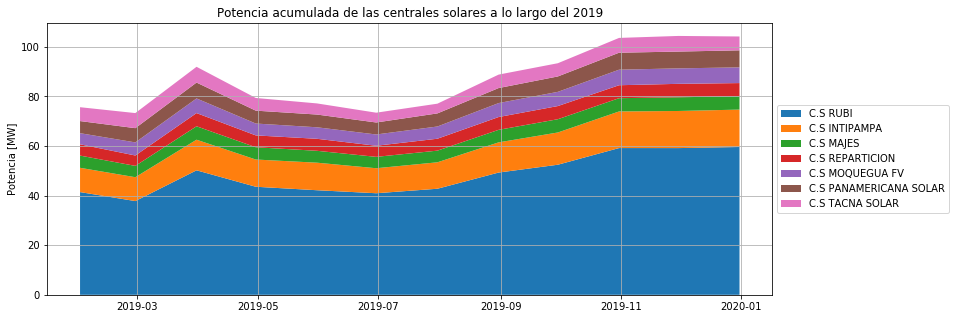

In [22]:
# CAMBIAR A ENERGÍA GENERADA MENSUAL

plt.figure(figsize=(13, 5))

plt.stackplot(production_monthly.index, production_monthly['C.S RUBI'], production_monthly['C.S INTIPAMPA'], production_monthly['C.S MAJES'], production_monthly['C.S REPARTICION'], 
             production_monthly['C.S MOQUEGUA FV'], production_monthly['C.S PANAMERICANA SOLAR'], production_monthly['C.S TACNA SOLAR'], labels=production_monthly.columns)

plt.title('Potencia acumulada de las centrales solares a lo largo del 2019')
plt.ylabel('Potencia [MW]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

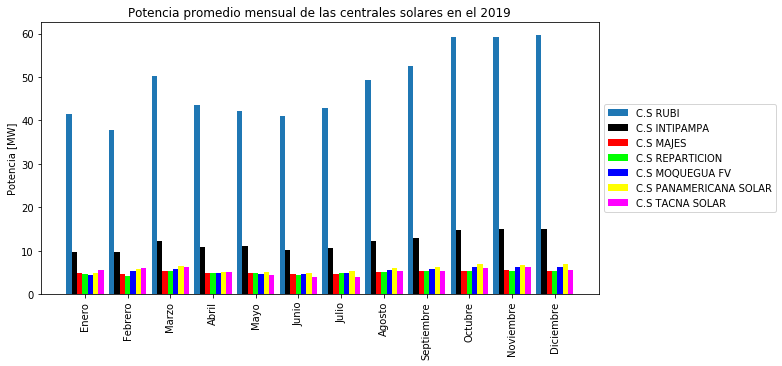

In [140]:
# https://stackoverflow.com/questions/11258212/python-matplotlib-restrict-to-integer-tick-locations
months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')
N = 12 #groups or months
ind = 4*np.arange(N) # the x locations for the groups
width = 0.5          # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, production_monthly['C.S RUBI'], width)
rects2 = ax.bar(ind+width, production_monthly['C.S INTIPAMPA'], width, color=(0,0,0))
rects3 = ax.bar(ind+width*2, production_monthly['C.S MAJES'], width, color=(1,0,0))
rects4 = ax.bar(ind+width*3, production_monthly['C.S REPARTICION'], width, color=(0,1,0))
rects5 = ax.bar(ind+width*4, production_monthly['C.S MOQUEGUA FV'], width, color=(0,0,1))
rects6 = ax.bar(ind+width*5, production_monthly['C.S PANAMERICANA SOLAR'], width, color=(1,1,0))
rects7 = ax.bar(ind+width*6, production_monthly['C.S TACNA SOLAR'], width, color=(1,0,1))

ax.set_title('Potencia promedio mensual de las centrales solares en el 2019')
ax.set_ylabel('Potencia [MW]')
ax.set_xticks(ind+width*3)
ax.set_xticklabels(months, rotation=90)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0], rects7[0]),
          (production.columns), loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()